### **A program called** *assignment_5_risk.ipynb*.

Author: Tomasz Uszynski

***


##### **Idea of the program.**

The program simulates 1000 individual battle rounds in Risk (3 attacker vs 2 defender) and plots the result.

One battle round is one shake of the attacker and defender dice.

##### **Rules of Risk**

In Risk one army fights another (using 6 sided dice).

In each battle round, the attacker can put forward up to three of their troops (3 dice).

The defender can use up to two of their defending troops (2 dice).

Each side looses troops depending on the following rules:

1. The two top dice dice are compared (ie the attackers top dice roll with the defenders top dice roll) 
    If the attackers dice is the same or lower they loose one troop otherwise the defender looses a troop   (ie if the attackers dice is higher)
2. The next two highest dice from each side are then compared (ie the attackers second highest to the   defenders second highest)
If the attackers dice is the same or lower they loose one troop otherwise the defender looses a troop  (ie if the attackers dice is higher)

***


##### **Realisation of the program idea.**

Importing neccesary libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Creating a function rollDice to simulate dice roll.

In [2]:
def rollDice(numDice):
    # Rolls dice and returns the results sorted in descending order
    return np.sort(np.random.choice(np.arange(1, 7), size=numDice))[::-1]

Creating function simulateBattleRounds taking argument numSimulations (number of simulations).

In [3]:
def simulateBattleRounds(numSimulations):
    attackerTotalLosses = 0
    defenderTotalLosses = 0

    for _ in range(numSimulations):
        # Simulate 3 dice rolls for the attacker and 2 for the defender
        attackerDice = rollDice(3)
        defenderDice = rollDice(2)
        '''
        This code checks if the dice rolls are correct.
        
        # Format dice results without brackets
        attackerDiceString = ' '.join(map(str, attackerDice))
        defenderDiceString = ' '.join(map(str, defenderDice))

        print(f'Attacker dice: {attackerDiceString}')
        print(f'Defender dice: {defenderDiceString}')
        '''
        # Initialise losses
        attackerLosses = 0
        defenderLosses = 0

        # Compare the highest dice
        for i in range(2):
            if attackerDice[i] > defenderDice[i]:
                defenderLosses += 1
            else:
                attackerLosses += 1

        attackerTotalLosses += attackerLosses
        defenderTotalLosses += defenderLosses

    return attackerTotalLosses, defenderTotalLosses

Simulation of 1000 battles.

In [4]:
numSimulations = 1000

attackerTotalLosses, defenderTotalLosses = simulateBattleRounds(numSimulations)


Printing out the result of battles.

In [5]:
print(f"Total Attacker Losses: {attackerTotalLosses}")
print(f"Total Defender Losses: {defenderTotalLosses}")

Total Attacker Losses: 916
Total Defender Losses: 1084


Plotting the result of simulation.

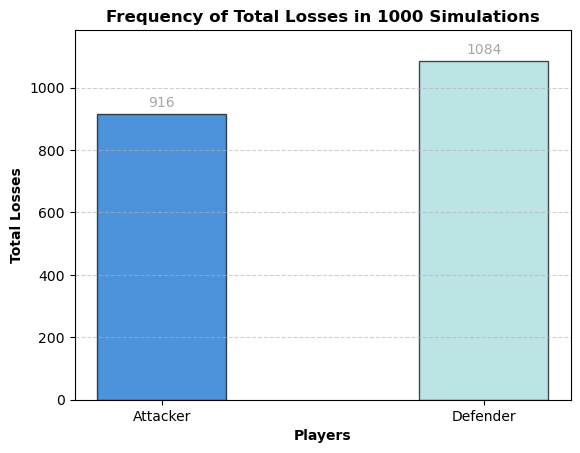

In [6]:
# Different color for each bar
colors = ['#06C', '#A2D9D9']

labels = ['Attacker', 'Defender']
losses = [attackerTotalLosses, defenderTotalLosses]
bars = plt.bar(labels, losses, color=colors, alpha=0.7, edgecolor='black', width=0.4)
plt.ylabel('Total Losses', fontsize=10, fontweight='bold')
plt.xlabel('Players', fontsize=10, fontweight='bold')
plt.title('Frequency of Total Losses in 1000 Simulations', fontsize=12, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Determine the maximum total losses for setting y-axis limit 
maxLosses = max(attackerTotalLosses, defenderTotalLosses)

plt.ylim(0, maxLosses + 100)

# Add descriptions above the bars 
for bar in bars:
    yval = bar.get_height() 
    plt.annotate(format(yval), 
                 (bar.get_x() + bar.get_width() / 2, yval),
                 ha='center', va='center', size=10, xytext=(0, 8),
                 textcoords='offset points', color='gray', alpha=0.7)
    
plt.show()

##### **Extra feature.**

Simulating a full series of rounds for armies of arbitrary sizes, until one side is wiped out.

In [7]:
def simulateBattle(attackerTroops, defenderTroops):
    attackerLosses = [attackerTroops]
    defenderLosses = [defenderTroops]
    roundNumber = 1

    while attackerTroops > 0 and defenderTroops > 0:
        #print(f"Round {roundNumber}") # Used to print the round number.
        
        attackerDice = rollDice(min(3, attackerTroops))
        defenderDice = rollDice(min(2, defenderTroops))
        
        #attackerDiceString = ' '.join(map(str, attackerDice))
        #defenderDiceString = ' '.join(map(str, defenderDice))
        
        #print(f'Attacker dice: {attackerDiceString}')  # Used to print the attacker dice.
        #print(f'Defender dice: {defenderDiceString}')  # Used to print the defender dice.
        
        attackerLoss = 0
        defenderLoss = 0
        
        for attackerDie, defenderDie in zip(attackerDice, defenderDice):
            if attackerDie > defenderDie:
                defenderLoss += 1
            else:
                attackerLoss += 1
        
        attackerTroops -= attackerLoss
        defenderTroops -= defenderLoss
        attackerLosses.append(attackerTroops)
        defenderLosses.append(defenderTroops)
        
        # Print the round results and remaining troops.
        #print(f"Round Results -> Attacker Losses: {attackerLoss}, Defender Losses: {defenderLoss}")
        #print(f"Remaining Troops -> Attacker: {attackerTroops}, Defender: {defenderTroops}")

        roundNumber += 1

    #print(f"Total number of rounds: {roundNumber - 1}")
    return attackerLosses, defenderLosses, roundNumber - 1


Simulation based on initialAttackerTroops and initialDefenderTroops.

In [10]:
initialAttackerTroops = 20
initialDefenderTroops = 15
attackerLosses, defenderLosses, totalRounds = simulateBattle(initialAttackerTroops, initialDefenderTroops)

Plotting the result.

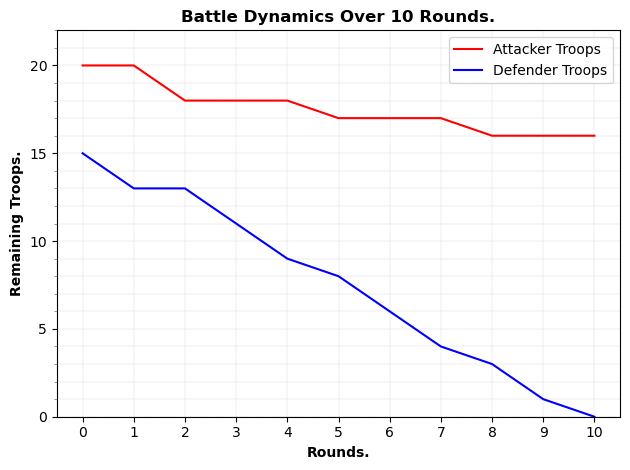

In [11]:
max_troops = max(initialAttackerTroops, initialDefenderTroops)

# Adjust x-axis and y-axis based on starting values
rounds = list(range(totalRounds + 1))

plt.plot(rounds, attackerLosses, label='Attacker Troops', color='red')
plt.plot(rounds, defenderLosses, label='Defender Troops', color='blue')
plt.xlabel('Rounds.', fontsize=10, fontweight='bold')
plt.ylabel('Remaining Troops.', fontsize=10, fontweight='bold')
plt.title(f'Battle Dynamics Over {totalRounds} Rounds.', fontsize=12, fontweight='bold')
plt.xticks(ticks=rounds) # Add ticks for each battle round
plt.ylim(0, max_troops * 1.1)  # Ensure y-axis covers the entire range of troops
# Main y-ticks every 5 
plt.yticks(np.arange(0, max_troops + 1, 5))
# Add minor ticks without labels 
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(1))
plt.gca().tick_params(which='minor', length=2, color='gray')
plt.grid(which='both', linestyle='--', linewidth=0.2)
plt.tight_layout()
plt.legend()
plt.show()

***
### End